# QuickSelect

## Algorithm Description

### Naive QuickSelect
> 在计算机科学中，**快速选择**（英语：Quickselect）是一种从无序列表找到第 $k$ 小元素的选择算法。它从原理上来说与快速排序有关。与快速排序一样都由托尼·霍尔提出的，因而也被称为**霍尔选择算法**。 同样地，它在实际应用是一种高效的算法，具有很好的平均时间复杂度，然而最坏时间复杂度则不理想。快速选择及其变种是实际应用中最常使用的高效选择算法。
<br><br>
快速选择的总体思路与快速排序一致，选择一个元素作为基准来对元素进行分区，将小于和大于基准的元素分在基准左边和右边的两个区域。不同的是，快速选择并不递归访问双边，而是只递归进入一边的元素中继续寻找。这降低了平均时间复杂度，从$O(n log n)$ 至 $O(n)$，不过最坏情况仍然是$O(n^2)$。
与快速排序一样，快速选择一般是以原地算法的方式实现，除了选出第 $k$ 小的元素，数据也得到了部分地排序。


大部分情况下，上面提到的情况可以通过随机选取基准来解决，但是少部分情况下（比如所有元素全都相等的时候），最坏情况仍为$O(n^2)$。因此我们需要其他的办法来解决这个问题。

### Modified QuickSelect(BFBRT)

解决上面最坏情况的办法是**通过某种选取基准的方法，使得每次划分子数组的长度都能至少以某个固定比例缩小。**
这里我们采取的方法是：

1. 将 个输入元素划分成 $\frac{n}{5}$ 个组，每组 $5$ 个元素，可能有一个组少于 $5$ 个元素。用任意一种排序算法，将每组的元素排好序，并取出每组的中位数，共 $\frac{n}{5}$ 个。
2. 递归调用select来找出这 $\frac{n}{5}$个元素的中位数。如果是偶数，就找它的 $2$ 个中位数中较大的一个。
3. 以这个元素作为划分基准。

这个算法在最坏情况下的复杂度也达到了 $O(n)$, 它的正式名字叫做**BFBRT**算法，这个名字来自它的五个提出者————Blum、Floyd、Pratt、Rivest、Tarjan。

关于这个算法的执行过程，我找到这样一张图片，可以清晰地描述：

![image_1cb76ji0016a41pia183410ij1ne99.png-47kB][3]

  [3]: http://static.zybuluo.com/EtoDemerzel/6b2wphy6q029ctrpnpp4mhr8/image_1cb76ji0016a41pia183410ij1ne99.png

## Implementation

虽然我们的project只要求我们实现线性时间的选择算法，但这里我们两种算法都实现一下，以便比较。

### Naive QuickSelect

这里的基准随机产生，毕竟这也是一个优化之处。另一个优化的地方在于，如果这个数组过小（不超过75个元素），那么我们选择直接对它排序。

In [108]:
def select_random_pivot(array, k):
    '''
    The implementation of QuickSelect algorithm to select the k'th smallest element.
    Here the pivot is chosen randomly.
    '''

    # If the array is short, terminate the recursion and return the
    # value without partitioning.
    if len(array) <= 75:
        array.sort()
        return array[k-1]

    # Randomly choose a pivot point.
    pivot_idx = random.randint(0, len(array) - 1)
    pivot = array[pivot_idx]

    # divide into three parts: little, great, and equal.
    array_lt = []
    array_gt = []
    array_eq = []
    for item in array:
        if item < pivot:
            array_lt.append(item)
        elif item > pivot:
            array_gt.append(item)
        else:
            array_eq.append(item)



    if k <= len(array_lt): # in the little part
        return select_random_pivot(array_lt, k)
    elif k <= len(array_lt) + len(array_eq): # in the equal part
        return array_eq[0]
    else: # in the great part
        normalized_k = k - (len(array_lt) + len(array_eq))
        return select_random_pivot(array_gt, normalized_k)

In [110]:
# simple test

# case 1: (less than ten) 
a = [14,5,3,7,4,2,9,7]
print(select_random_pivot(a, 3))



# case 2:
import numpy as np
from numpy import random

a = np.random.randint(0, 100, size = 100)
b = sorted(a)
print(b[87-1])
print(select_random_pivot(a,87))

4
83
83


### BFBRT

In [127]:
def select_median_of_medians_pivot(array, k):
    '''
    Implementation of BFBRT algorithm.
    Here the worst case complexity is O(n).
    '''
 
    # If the array is short, terminate the recursion and return the
    # value without partitioning.
    if len(array) <= 75:
        array.sort()
        return array[k-1]
 
    subset_size = 5  
    subsets = []  # list of subsets
    num_medians = len(array) // subset_size
    if (len(array) % subset_size) > 0:
        num_medians += 1
    for i in range(num_medians):
        beg = i * subset_size # the begining position of every subset
        end = min(len(array), beg + subset_size) # the ending position of every subset
        subset = array[beg:end]
        subsets.append(subset)
 
    # here we recursively call this select_median_of_median_pivot to get the medians
    medians = []  # list of medians
    for subset in subsets:
        #median = select_median_of_medians_pivot(subset, len(subset)//2)
        # actually we could have written: 
        subset.sort()
        median = subset[len(subset)//2 - 1]
        # but it is almost the same since when len<75, we will sort it.
        medians.append(median)
 
    
    # recursively call this function to get the median of median
    median_of_medians = select_median_of_medians_pivot(medians, len(medians)//2)
    pivot = median_of_medians  
 
    # partition
    array_lt = []
    array_gt = []
    array_eq = []
    for item in array:
        if item < pivot:
            array_lt.append(item)
        elif item > pivot:
            array_gt.append(item)
        else:
            array_eq.append(item)
 
    # the same as the former one
    if k <= len(array_lt):
        return select_median_of_medians_pivot(array_lt, k)
    elif k <= len(array_lt) + len(array_eq):
        return array_eq[0]
    else:
        normalized_k = k - (len(array_lt) + len(array_eq))
        return select_median_of_medians_pivot(array_gt, normalized_k)

In [131]:
# simple test
a = np.random.randint(0, 1000, size = 1000)
b = sorted(a)
print(b[45-1])
print(select_median_of_medians_pivot(a,45))

43
43


## Test of correctness

我们在从 $10$ 到 $100000$ 大小的数据集上进行测试，每个数据集上选取 $5$ 个位置。

In [132]:
def correct_test(flag):
    '''
    when flag == 1, we test the correctness of select_random_pivot.
    when flag == 0, we test the correctness of select_median_of_medians_pivot.
    '''
    data_size = [10, 50, 100, 200, 500, 1000, 2000, 5000, 8000, 10000, 50000, 80000, 100000]
    
    for i in data_size:
        data = list(500000*np.random.random(i))
        sorted_data = sorted(data)
    
        if flag == 1:
            for j in range(5): # each dataset with 5 different test
                k = random.randint(1, i+1)
                result = select_random_pivot(data, k)
            
                print('Same as built-in method?', result == sorted_data[k-1])
            print('---------------------- dataset division  ---------------------')
        
        if flag == 0:
            for j in range(5): # each dataset with 5 different test
                k = random.randint(1, i+1)
                result = select_median_of_medians_pivot(data, k)
            
                print('Same as built-in method?', result == sorted_data[k-1])
            print('---------------------- dataset division  ---------------------')

In [115]:
correct_test(1)

Same as built-in method? True
Same as built-in method? True
Same as built-in method? True
Same as built-in method? True
Same as built-in method? True
---------------------- dataset division  ---------------------
Same as built-in method? True
Same as built-in method? True
Same as built-in method? True
Same as built-in method? True
Same as built-in method? True
---------------------- dataset division  ---------------------
Same as built-in method? True
Same as built-in method? True
Same as built-in method? True
Same as built-in method? True
Same as built-in method? True
---------------------- dataset division  ---------------------
Same as built-in method? True
Same as built-in method? True
Same as built-in method? True
Same as built-in method? True
Same as built-in method? True
---------------------- dataset division  ---------------------
Same as built-in method? True
Same as built-in method? True
Same as built-in method? True
Same as built-in method? True
Same as built-in method? Tru

In [133]:
correct_test(0)

Same as built-in method? True
Same as built-in method? True
Same as built-in method? True
Same as built-in method? True
Same as built-in method? True
---------------------- dataset division  ---------------------
Same as built-in method? True
Same as built-in method? True
Same as built-in method? True
Same as built-in method? True
Same as built-in method? True
---------------------- dataset division  ---------------------
Same as built-in method? True
Same as built-in method? True
Same as built-in method? True
Same as built-in method? True
Same as built-in method? True
---------------------- dataset division  ---------------------
Same as built-in method? True
Same as built-in method? True
Same as built-in method? True
Same as built-in method? True
Same as built-in method? True
---------------------- dataset division  ---------------------
Same as built-in method? True
Same as built-in method? True
Same as built-in method? True
Same as built-in method? True
Same as built-in method? Tru

于是我们验证了这两个算法的正确性。

## Performance measurement

与往常一样，我们被要求分析**最坏情况和平均情况**下的时间复杂度。有趣的是，BFBRT算法之所以被提出，正是因为它的最坏情况也是$O(n)$。至于随机选择基准的快速选择，由于其随机性，也很难出现所谓的最坏情况（我能想到的只有所有元素都相同的情况，但老师在群里提到元素应该各异，那么这个情况也不存在了）。

但是这些优化都是针对**未优化的快速选择（即固定基准）可能出现的最坏情况**所做的优化，目的是解决这种情况下可能出现的最坏情况的问题。因此，我们这里选取的最坏情况的数据，是针对**未优化版本的快速选择**选取的；也就是有序的数据。这种情况下，选择第 $n$ 小的元素（也就是最大元素）递归最深。

而平均情况下，数据随机产生，所选择的 $k$ 也随机产生。

### Ordered datasets

In [134]:
import time

def ordered_measure(flag):
    '''
    Performance on ordered datasets.
    when flag == 1, we measure select_random_pivot,
    when flag == 0, we measure select_median_of_medians_pivot.
    '''
    
    runtime = []
    
    # generate the datasets
    data_size = [50, 100, 200, 500, 1000, 2000, 5000, 8000, 10000, 50000, 80000, 100000]
    
    for i in data_size:
        data = sorted(list(500000*np.random.random(i)))
        if flag == 1:
            tic = time.time()
            for j in range(100):
                x = select_random_pivot(data, i)
            toc = time.time()
            runtime.append(toc - tic)
            
        elif flag == 0:
            tic = time.time()
            for j in range(100):
                x = select_median_of_medians_pivot(data, i)
            toc = time.time()
            runtime.append(toc - tic)
            
    return runtime

In [135]:
random_time = ordered_measure(1)
random_time

[0.0005013942718505859,
 0.004511833190917969,
 0.010025978088378906,
 0.023563861846923828,
 0.06370806694030762,
 0.0811769962310791,
 0.15189313888549805,
 0.22911405563354492,
 0.32886695861816406,
 1.6463472843170166,
 3.300302743911743,
 3.7286229133605957]

In [136]:
median_time = ordered_measure(0)
median_time

[0.0,
 0.006122112274169922,
 0.01897907257080078,
 0.05464577674865723,
 0.10427737236022949,
 0.2561826705932617,
 0.532416582107544,
 1.0408177375793457,
 1.3004586696624756,
 8.180448532104492,
 14.199047088623047,
 19.182743787765503]

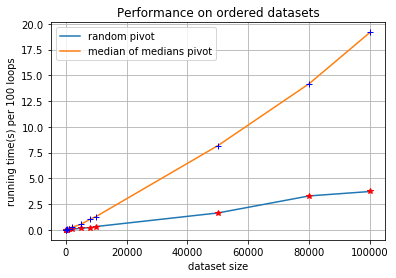

In [144]:
from matplotlib.pyplot import *
% matplotlib inline

data_size = [50, 100, 200, 500, 1000, 2000, 5000, 8000, 10000, 50000, 80000, 100000]
plot(data_size, random_time,label = 'random pivot')
plot(data_size, median_time, label = 'median of medians pivot')
plot(data_size, random_time, 'r*')
plot(data_size, median_time, 'b+')
legend(loc = 'best')
xlabel('dataset size')
ylabel('running time(s) per 100 loops')
title('Performance on ordered datasets')
grid()

### Random datasets

In [146]:
def random_measure(flag):
    '''
    Performance on ordered datasets.
    when flag == 1, we measure select_random_pivot,
    when flag == 0, we measure select_median_of_medians_pivot.
    '''
    
    runtime = []
    
    # generate the datasets
    data_size = [50, 100, 200, 500, 1000, 2000, 5000, 8000, 10000, 50000, 80000, 100000]
    
    for i in data_size:
        data = list(500000*np.random.random(i))
        if flag == 1:
            tic = time.time()
            k = random.randint(0, i + 1)
            for j in range(100):
                x = select_random_pivot(data, k)
            toc = time.time()
            runtime.append(toc - tic)
            
        elif flag == 0:
            tic = time.time()
            k = random.randint(0, i + 1)
            for j in range(100):
                x = select_median_of_medians_pivot(data, k)
            toc = time.time()
            runtime.append(toc - tic)
            
    return runtime

In [147]:
rand_time = random_measure(1)
rand_time

[0.0,
 0.006518840789794922,
 0.01403498649597168,
 0.042613983154296875,
 0.08823466300964355,
 0.14087462425231934,
 0.25220441818237305,
 0.3933427333831787,
 0.46172571182250977,
 2.392361640930176,
 3.1057281494140625,
 4.881023645401001]

In [148]:
mid_time = random_measure(0)

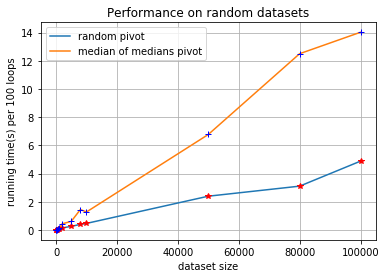

In [149]:
data_size = [50, 100, 200, 500, 1000, 2000, 5000, 8000, 10000, 50000, 80000, 100000]
plot(data_size, rand_time,label = 'random pivot')
plot(data_size, mid_time, label = 'median of medians pivot')
plot(data_size, rand_time, 'r*')
plot(data_size, mid_time, 'b+')
legend(loc = 'best')
xlabel('dataset size')
ylabel('running time(s) per 100 loops')
title('Performance on random datasets')
grid()

可以看出，两种算法基本都是线性的，所以我们验证了算法复杂度为 $O(n)$。

可以看出，随机选取基准还要更快些。这是因为随机选取基准的情况已经很难出现所谓最坏情况了，在这样的前提下，BFBRT花费了更多的时间在选取基准上。因此这是可以理解的。

再比较一下两种情况下的BFBRT的情况。

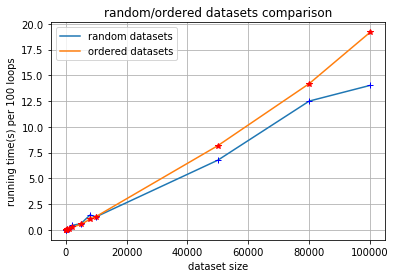

In [150]:
plot(data_size, mid_time, label = 'random datasets')
plot(data_size, mid_time, 'b+')
plot(data_size, median_time, label = 'ordered datasets')
plot(data_size, median_time, 'r*')
legend(loc = 'best')
xlabel('dataset size')
ylabel('running time(s) per 100 loops')
title('random/ordered datasets comparison')
grid()

两种情况差距不大，因此我们可以说，BFBRT已经解决了这个最坏情况的问题。

## Conclusion

1. BFBRT的最差情况也是 $O(n)$ 的，这是一个效率非常稳定的线性算法。
2. BFBRT需要选取中位数的中位数时需要一些开销，因此在大多数情况下要比随机选取基准要慢；事实上，《算法导论》中提到，一些计算机科学家们给出了一个寻找中位数所需的比较次数的下界 $(2+\epsilon)n$ 次，因此相对来说还是开销较大的。从另外一方面来说，它的实现也要比随机选取基准更加复杂。尽管随机选取的最坏情况仍然是 $O(n^2)$, 但这种情况发生的概率非常小。因此我认为，在大多数情况下，使用随机选取基准会是更好的选择。